In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lon = np.linspace(-15,15,501)
lat = np.linspace(-15,15,501)
lon,lat = np.meshgrid(lon,lat)

h = np.where(lon<10,4000,-4000)

(-15.0, 15.0, -15.0, 15.0)

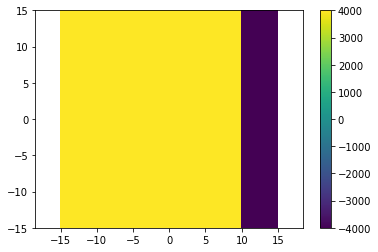

In [3]:
plt.pcolormesh(lon,lat,h)
plt.colorbar()
plt.axis('equal')

In [4]:
import pprint
pois = np.array([
    [-8,10],[0,10],[8, 10],
    [-8,5],[0,5],[8, 5],
    [-8,0],[0,0],[8, 0],
    [-8,-5],[0,-5],[8, -5],
    [-8,-10],[0,-10],[8, -10]
])

In [5]:
pois_dict = {}
for i,p in enumerate(pois):
    name='p'+str(i)
    pois_dict[name]={'location': list(p)}
    print(name, p[0], p[1], 0)

pprint.pprint(pois_dict)

p0 -8 10 0
p1 0 10 0
p2 8 10 0
p3 -8 5 0
p4 0 5 0
p5 8 5 0
p6 -8 0 0
p7 0 0 0
p8 8 0 0
p9 -8 -5 0
p10 0 -5 0
p11 8 -5 0
p12 -8 -10 0
p13 0 -10 0
p14 8 -10 0
{'p0': {'location': [-8, 10]},
 'p1': {'location': [0, 10]},
 'p10': {'location': [0, -5]},
 'p11': {'location': [8, -5]},
 'p12': {'location': [-8, -10]},
 'p13': {'location': [0, -10]},
 'p14': {'location': [8, -10]},
 'p2': {'location': [8, 10]},
 'p3': {'location': [-8, 5]},
 'p4': {'location': [0, 5]},
 'p5': {'location': [8, 5]},
 'p6': {'location': [-8, 0]},
 'p7': {'location': [0, 0]},
 'p8': {'location': [8, 0]},
 'p9': {'location': [-8, -5]}}


In [6]:
eta  = 0.1*np.exp(-(lon**2+lat**2)/6)

(-15.0, 15.0, -15.0, 15.0)

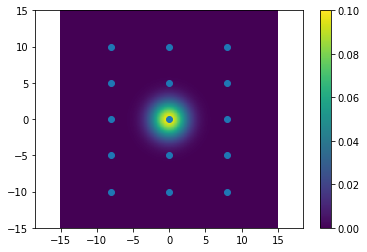

In [7]:
plt.pcolormesh(lon, lat, eta)
plt.colorbar()
plt.scatter(pois[:,0],pois[:,1])

plt.axis('equal')

In [8]:
np.savetxt('bathymetry',h)
np.savetxt('initialSurface',eta)

In [9]:
def writeGRD(z,name, xll, xur, yll, yur):
    ncols = z.shape[1]
    nrows = z.shape[0]
    f = open(name,'w')
    f.write('DSAA\n')
    f.write('%i %i\n'%(ncols, nrows))
    f.write('%.3f %.3f\n'%(xll,xur))
    f.write('%.3f %.3f\n'%(yll,yur))


    f.write('%.3f %.3f\n'%(z.min(),z.max()))

    s = [' '.join(['%.5f '%num for num in z[-i,:]]) for i in range(z.shape[0])]

    for ss in s:
        f.write('%s\n'%ss)
    f.close()

# writeGRD(np.flipud(z),'bathymetry{}mins.grd'.format(k))

In [10]:
writeGRD(-np.flipud(h), 'easywave/bathymetryEasywave.grd', 
         lon.min(), lon.max(), lat.min(), lat.max() )

In [11]:
writeGRD(np.flipud(eta), 'easywave/initSurfaceEasywave.grd', 
         lon.min(), lon.max(), lat.min(), lat.max() )